# Linearna regresija

### Ucitavanje biblioteka

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

### Ucitavanje skupa podataka

In [34]:
data = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data = data.dropna()
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [35]:
data.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.650719,0.650644,0.650803,0.650714,-0.103926,0.228190,0.650737
Open,0.650719,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.650644,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.650803,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.650714,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.103926,-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.228190,0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.650737,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


In [36]:
abs(data.corr())['Close'].sort_values(ascending=False)

Close                1.000000
Weighted_Price       1.000000
High                 0.999999
Low                  0.999999
Open                 0.999999
Timestamp            0.650714
Volume_(Currency)    0.344036
Volume_(BTC)         0.051877
Name: Close, dtype: float64

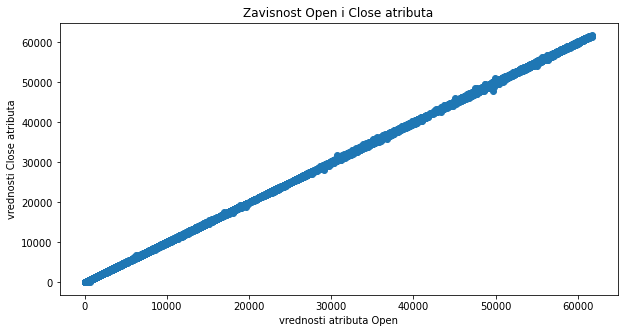

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(x=data['Open'], y=data['Close'])
plt.xlabel('vrednosti atributa Open')
plt.ylabel('vrednosti Close atributa')
plt.title('Zavisnost Open i Close atributa')
plt.show()

In [38]:
X = np.array(data['Open']).reshape(-1,1) # skup atributa
y = np.array(data['Close']).reshape(-1,1) # ciljna promenljiva koju treba predvideti

In [39]:
y

array([[4.390000e+00],
       [4.390000e+00],
       [4.570000e+00],
       ...,
       [5.872384e+04],
       [5.876059e+04],
       [5.877818e+04]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

Intercept: -0.068
Coefficient: 1.000
MAE: 5.048


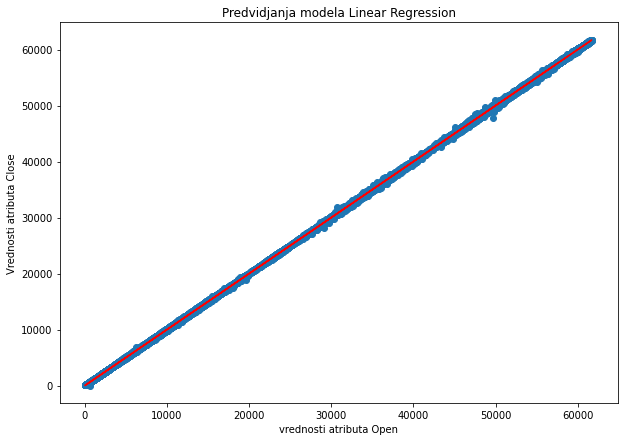

In [41]:
# Kreiranje i treniranje modela

lm = LinearRegression()
lm.fit(X_train, y_train)

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))

# Predvidjanje modela i racunanje MAE (srednje apsolutne greske)

mae = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE: {:,.3f}".format(mae))

# Vizuelni prikaz rezultata

plt.figure(figsize=(10,7))
plt.scatter(x=data['Open'], y=data['Close'])
plt.plot(X_test, lm.predict(X_test), color='red')
plt.xlabel('vrednosti atributa Open')
plt.ylabel('Vrednosti atributa Close')
plt.title('Predvidjanja modela Linear Regression')
plt.show()